# 不同model的square error長相
## y=x
## y=x**2
## y=x**3

## cost = (y-y_hat)**2

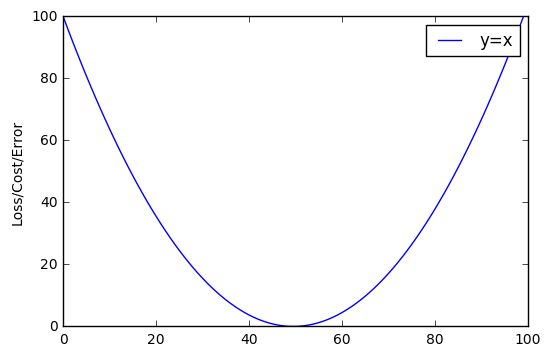

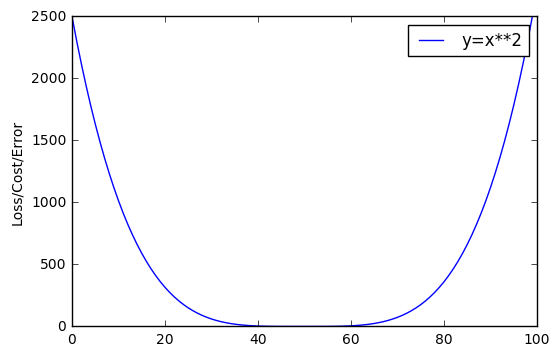

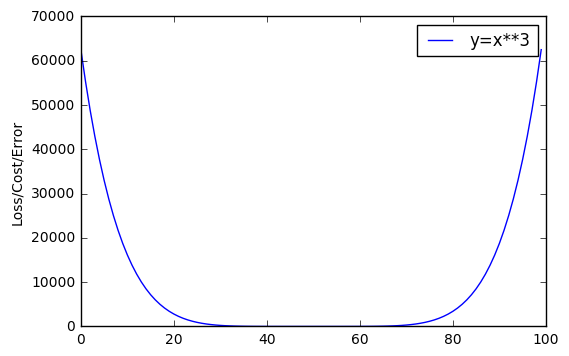

In [1]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

### data
x_data = floatX(np.array(np.linspace(-5.0, 5.0, 100)))
y_data_1 = floatX(np.array(x_data)) # y=x
y_data_2 = floatX(np.array(x_data**2)) # y=x**2
y_data_3 = floatX(np.array(x_data**3)) # y=x**3

### params / init weights
w = theano.shared(-1.)
    
### model
x = T.scalar()
y1 = w*x
f1 = theano.function([x], y1)
y2 = w*x**2
f1 = theano.function([x], y2)
y3 = w*x**3
f1 = theano.function([x], y3)

### cost/error/loss
y_hat = T.scalar()
cost1 = (y1-y_hat)**2
cost2 = (y2-y_hat)**2
cost3 = (y3-y_hat)**2


cost_f1_list = []
cost_f1 = theano.function([x, y_hat], cost1)
for i in range(x_data.shape[0]):
    cost_f1_list.append(cost_f1(x_data[i], y_data_1[i]))
    
cost_f2_list = []
cost_f2 = theano.function([x, y_hat], cost2)
for i in range(x_data.shape[0]):
    cost_f2_list.append(cost_f2(x_data[i], y_data_2[i]))
    
cost_f3_list = []
cost_f3 = theano.function([x, y_hat], cost3)
for i in range(x_data.shape[0]):
    cost_f3_list.append(cost_f3(x_data[i], y_data_3[i]))
    
f1_plot, = plt.plot(cost_f1_list, label='y=x')
plt.legend(handles=[f1_plot])
plt.ylabel("Loss/Cost/Error")
plt.show()
f2_plot, = plt.plot(cost_f2_list, label='y=x**2')
plt.legend(handles=[f2_plot])
plt.ylabel("Loss/Cost/Error")
plt.show()
f3_plot, = plt.plot(cost_f3_list, label='y=x**3')
plt.legend(handles=[f3_plot])
plt.ylabel("Loss/Cost/Error")
plt.show()

* 都是convex，但底部被壓平了，是否做gradient desecent的時候會卡住(微分趨近於0)，plateau?
* http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Gradient%20Descent%20(v2).pdf#page=37